In [1]:
# 1_EDA_and_Data_Cleaning.ipynb

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [27]:
# Load the dataset
data = pd.read_csv('../data/AmesHousing.csv')
data = pd.get_dummies(data, drop_first=True)

In [28]:
correlation_matrix = data.corr()
top_features = correlation_matrix['SalePrice'].abs().sort_values(ascending=False).index[1:11]
print("Top 10 Features Correlated with SalePrice:\n", top_features)

# Filter the dataset to keep only the top 10 features and SalePrice
data = data[['SalePrice'] + top_features.to_list()]
data.dropna()

Top 10 Features Correlated with SalePrice:
 Index(['Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Garage Area',
       'Total Bsmt SF', '1st Flr SF', 'Exter Qual_TA', 'Year Built',
       'Full Bath', 'Year Remod/Add'],
      dtype='object')


In [29]:
# Basic data exploration
print("Dataset Shape:", data.shape)
print("Dataset Columns:", data.columns)
print("Missing Values:\n", data.isnull().sum().sort_values(ascending=False).head(20))
print("Dataset Description:\n", data.describe())



Dataset Shape: (2930, 11)
Dataset Columns: Index(['SalePrice', 'Overall Qual', 'Gr Liv Area', 'Garage Cars',
       'Garage Area', 'Total Bsmt SF', '1st Flr SF', 'Exter Qual_TA',
       'Year Built', 'Full Bath', 'Year Remod/Add'],
      dtype='object')
Missing Values:
 Garage Cars       1
Garage Area       1
Total Bsmt SF     1
SalePrice         0
Overall Qual      0
Gr Liv Area       0
1st Flr SF        0
Exter Qual_TA     0
Year Built        0
Full Bath         0
Year Remod/Add    0
dtype: int64
Dataset Description:
            SalePrice  Overall Qual  Gr Liv Area  Garage Cars  Garage Area  \
count    2930.000000   2930.000000  2930.000000  2929.000000  2929.000000   
mean   180796.060068      6.094881  1499.690444     1.766815   472.819734   
std     79886.692357      1.411026   505.508887     0.760566   215.046549   
min     12789.000000      1.000000   334.000000     0.000000     0.000000   
25%    129500.000000      5.000000  1126.000000     1.000000   320.000000   
50%    16000

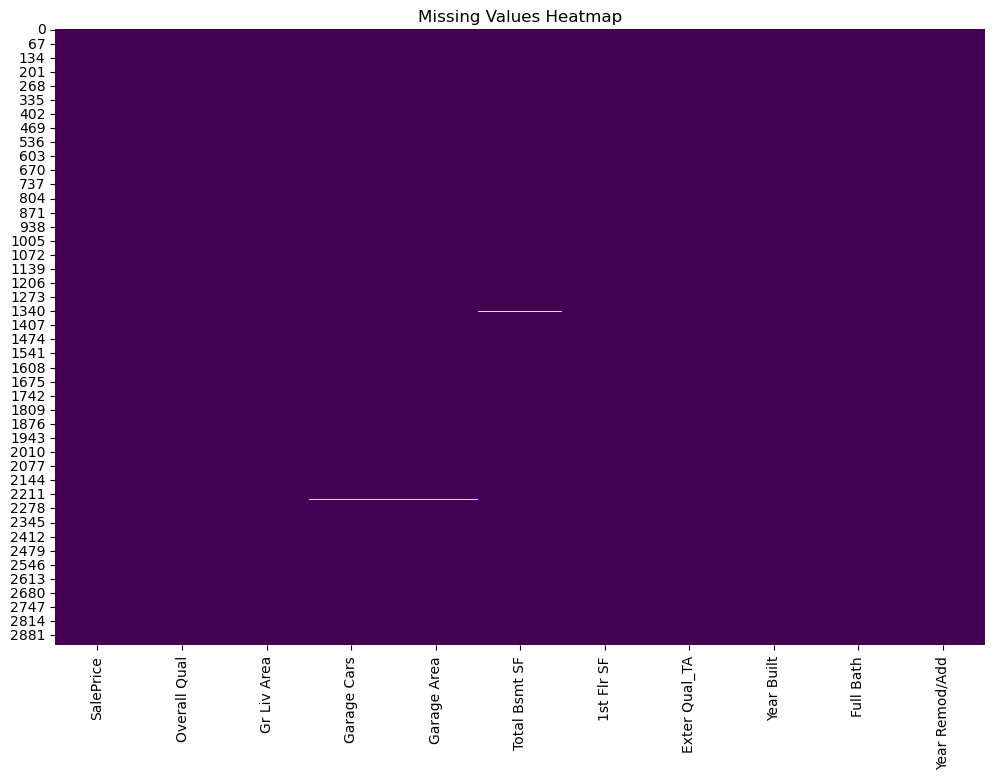

In [30]:
# Visualize missing values
plt.figure(figsize=(12, 8))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


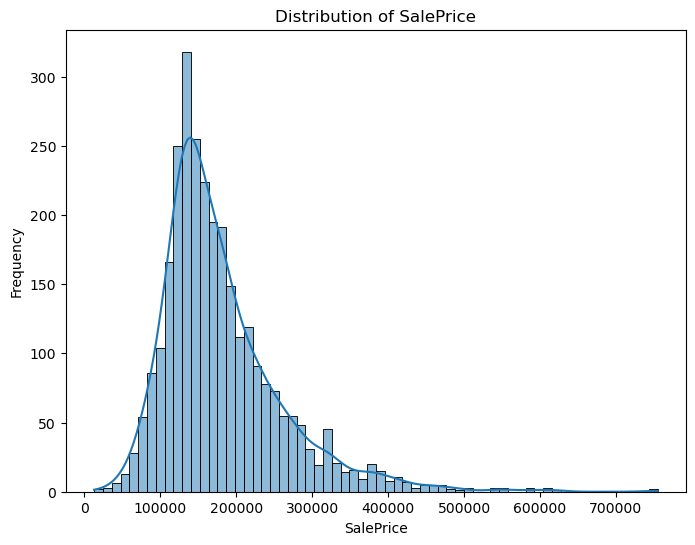

In [31]:
# Distribution of SalePrice
plt.figure(figsize=(8, 6))
sns.histplot(data['SalePrice'], kde=True)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()


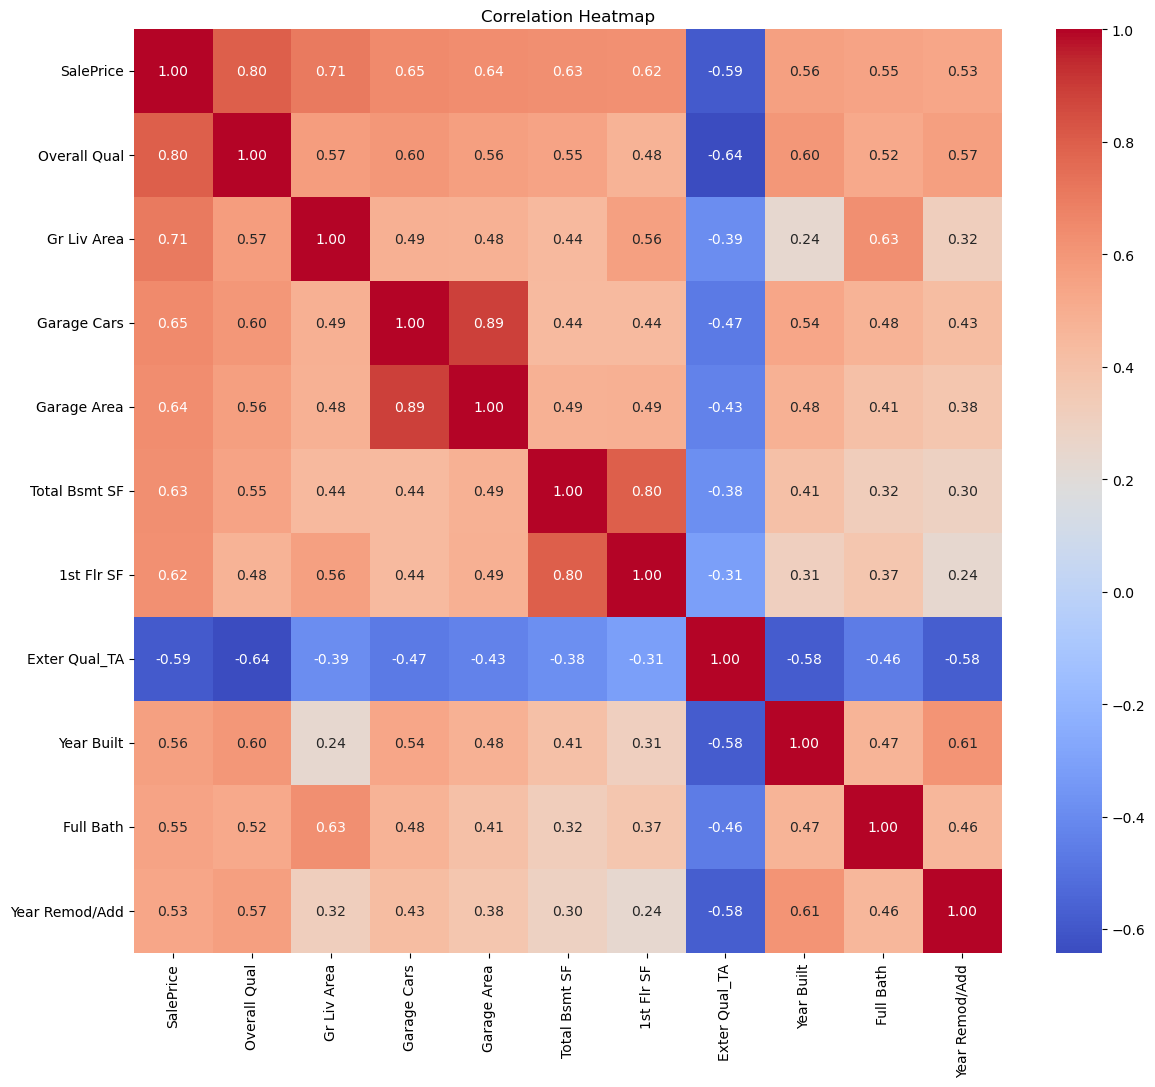

In [32]:
# Correlation heatmap
plt.figure(figsize=(14, 12))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

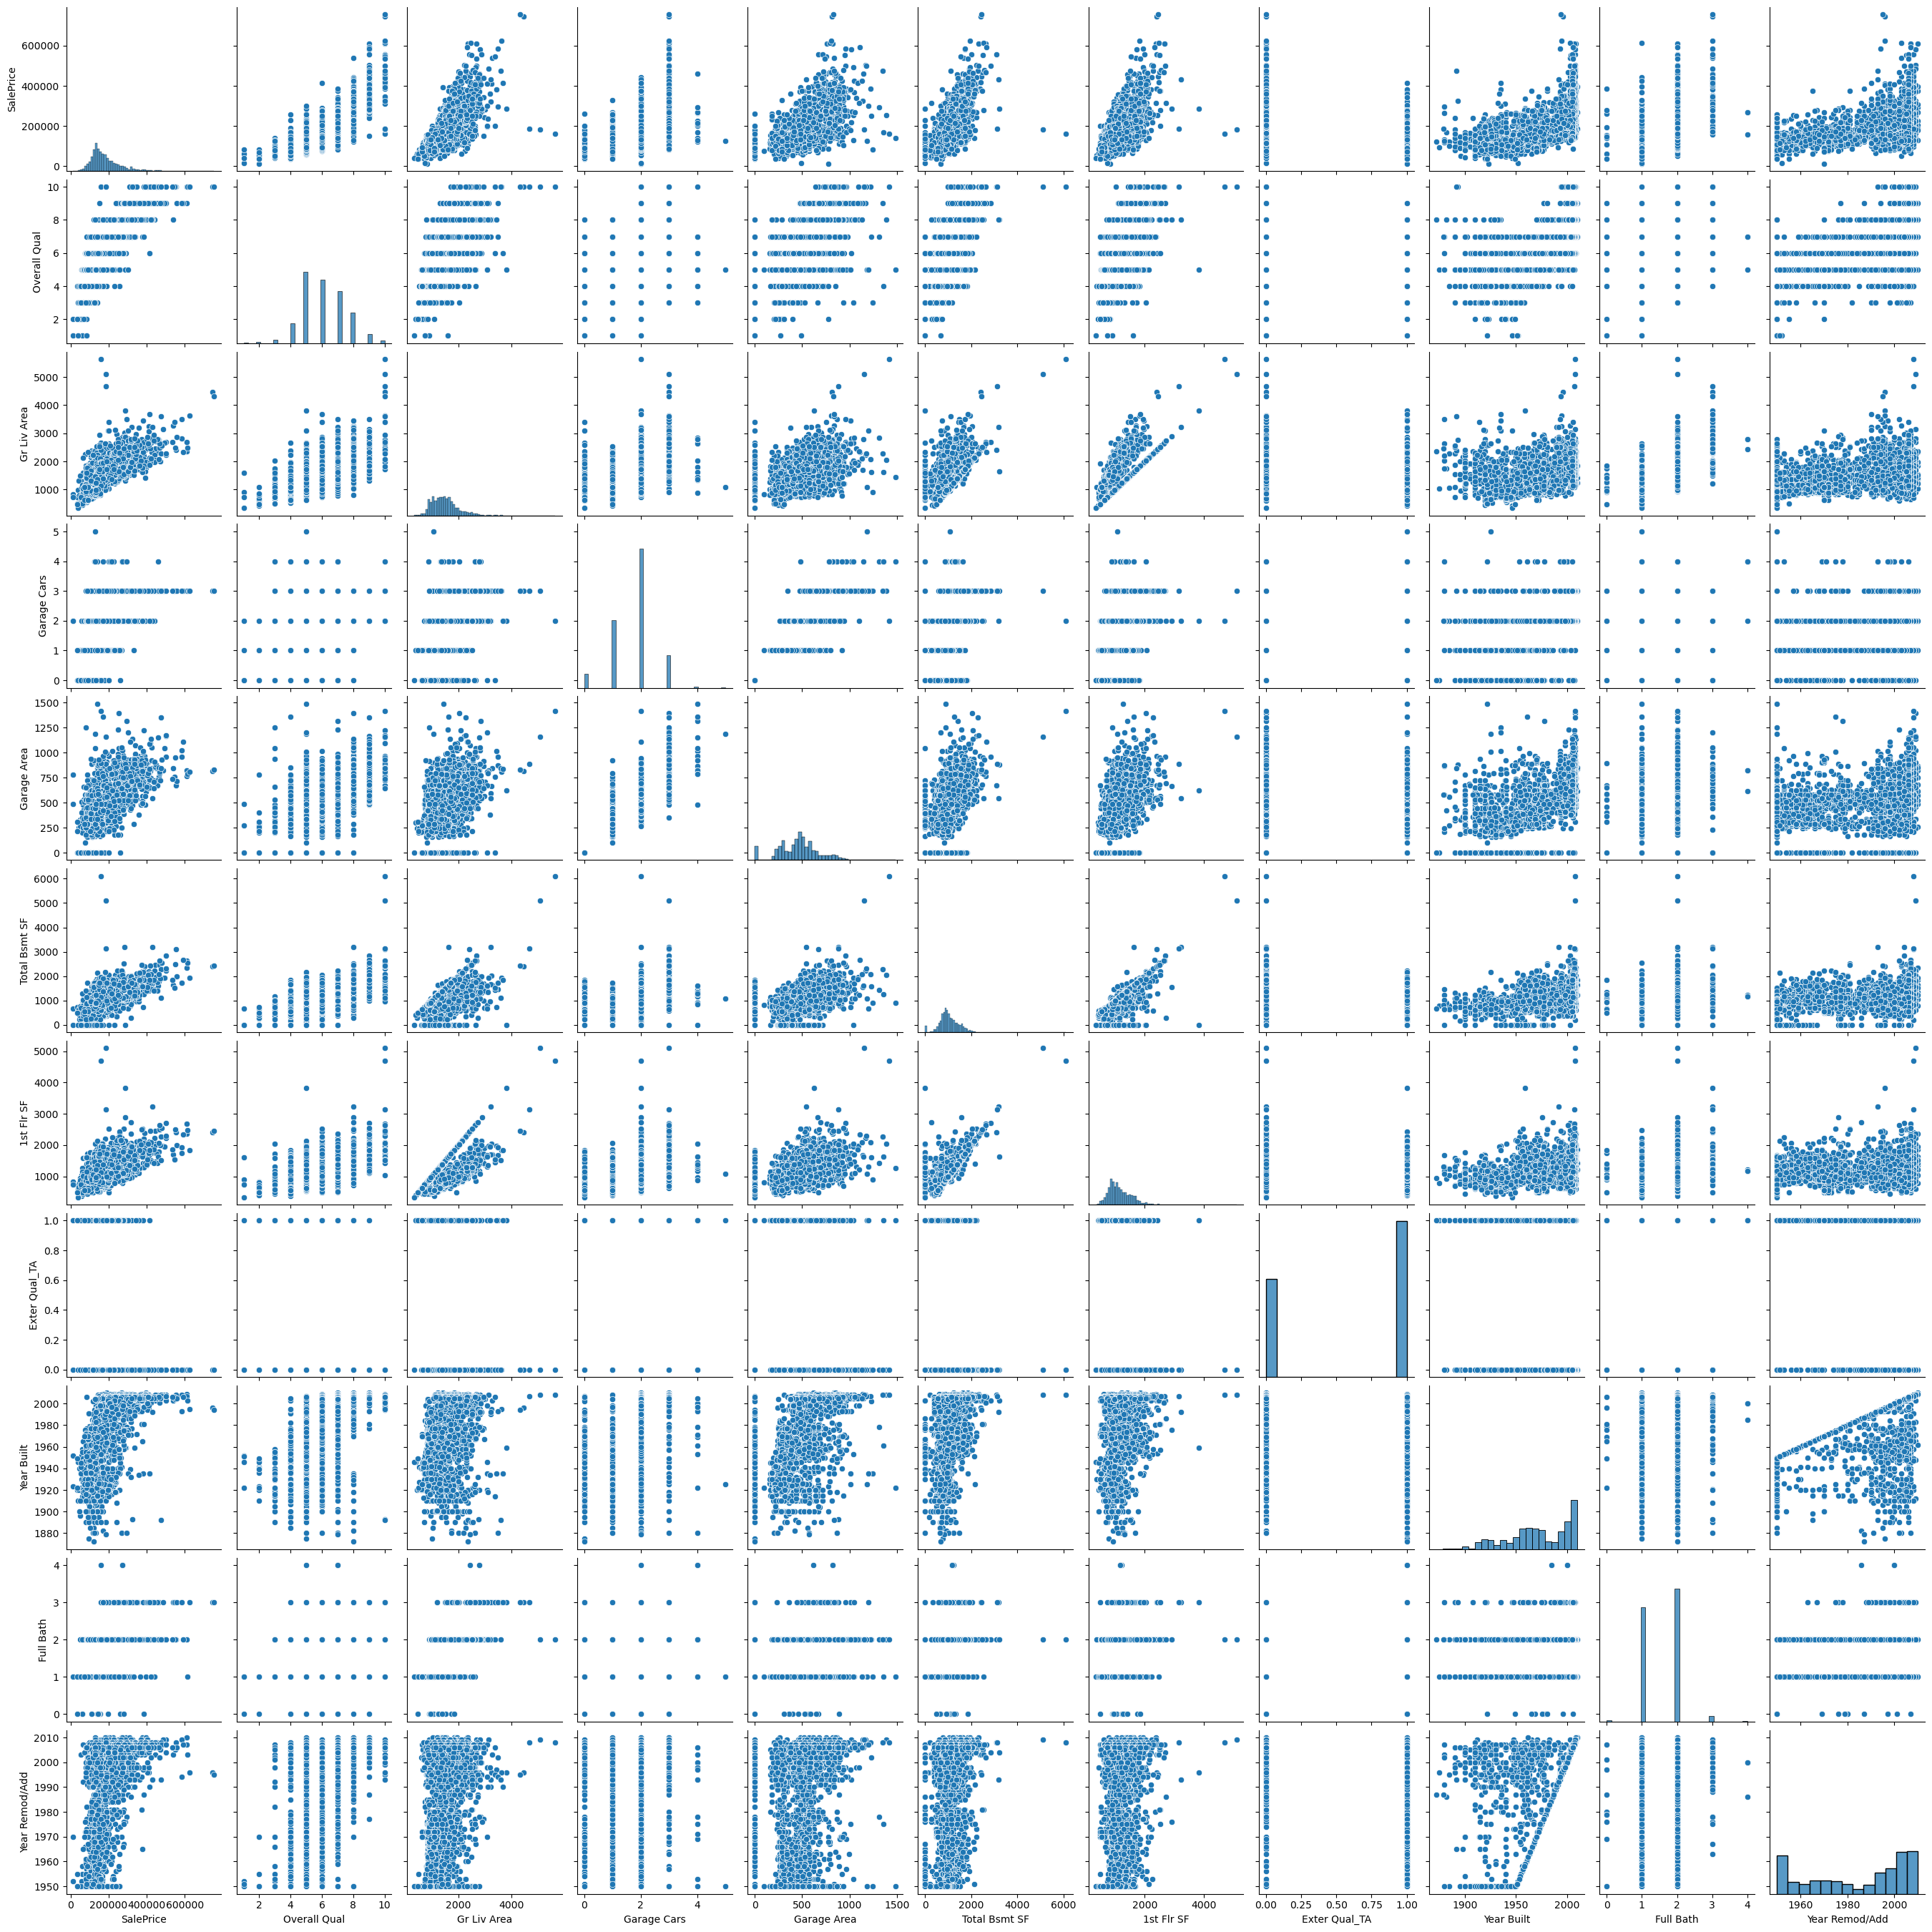

In [33]:
# Pairplot of top correlated features with SalePrice
sns.pairplot(data)
plt.show()

In [34]:
# Boxplot of SalePrice vs. OverallQual
plt.figure(figsize=(10, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=data)
plt.title('SalePrice vs. OverallQual')
plt.xlabel('Overall Quality')
plt.ylabel('SalePrice')
plt.show()

ValueError: Could not interpret value `OverallQual` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

In [ ]:
# Scatter plot of GrLivArea vs. SalePrice
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=data)
plt.title('GrLivArea vs. SalePrice')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

In [ ]:
# Handling missing values
data['LotFrontage'] = data['LotFrontage'].fillna(data['LotFrontage'].median())
data = data.drop(columns=['Alley', 'PoolQC', 'Fence', 'MiscFeature'])
data = data.fillna(data.median())

# Remove outliers
data = data[data['GrLivArea'] < 4000]

# Summary of data cleaning
print("Remaining Missing Values:\n", data.isnull().sum().sort_values(ascending=False).head(20))
print("Dataset Shape After Cleaning:", data.shape)

In [ ]:
# Split the data into training and testing sets
train, test = train_test_split(data, test_size=0.2, random_state=42)

# Save the resulting datasets to CSV files
train.to_csv('../data/train.csv', index=False)
test.to_csv('../data/test.csv', index=False)

print("Data successfully split into train and test sets.")